In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
pd.set_option('display.float_format', '{:.2f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#%pip install Faker

In [3]:
hist_comp_madrid_int = pd.read_csv('../../evolucion_precioporm2_madrid_centro.csv')

hist_comp_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,4.268 €/m2,"+ 1,9 %","+ 5,0 %","+ 9,5 %",NaN
1,Enero 2024,4.190 €/m2,"+ 1,7 %","+ 3,1 %","+ 8,2 %",NaN
2,Diciembre 2023,4.118 €/m2,"+ 1,3 %","+ 2,0 %","+ 6,1 %",NaN
3,Noviembre 2023,4.064 €/m2,"+ 1,2 %","+ 3,8 %","0,0 %",NaN
4,Octubre 2023,4.064 €/m2,"+ 0,7 %","+ 1,6 %","+ 3,8 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,3.551 €/m2,"+ 2,1 %",n.d.,n.d.,NaN
214,Abril 2006,3.478 €/m2,NaN,n.d.,n.d.,"- 3,7 %"
215,Marzo 2006,3.609 €/m2,n.d.,n.d.,n.d.,NaN
216,Febrero 2006,n.d.,n.d.,n.d.,n.d.,NaN


In [4]:
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [5]:
hist_comp_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [6]:
hist_comp_madrid_int = hist_comp_madrid_int.iloc[:-2, :]

In [7]:
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('€/m2', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('.', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].astype(int)

In [8]:
hist_comp_madrid_int[['mes', 'año']] = hist_comp_madrid_int['fecha'].str.split(expand=True)
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns='fecha')

In [9]:
hist_comp_madrid_int = hist_comp_madrid_int[['año', 'mes', '€/m2']]

In [10]:
meses_a_numero = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

In [11]:
hist_comp_madrid_int['mes'] = hist_comp_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [12]:
hist_comp_madrid_int['fecha'] = pd.to_datetime(hist_comp_madrid_int['año'].astype(str) + '-' + hist_comp_madrid_int['mes'].astype(str), format='%Y-%m')

hist_comp_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [13]:
hist_comp_madrid_int = hist_comp_madrid_int[['fecha', '€/m2']]

In [14]:
hist_comp_madrid = pd.read_csv('../../evolucion_precioporm2_madrid.csv')

In [15]:
hist_comp_madrid

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5
0,Febrero 2024,3.292 €/m2,"+ 1,4 %","+ 3,8 %","+ 6,8 %"
1,Enero 2024,3.247 €/m2,"+ 1,2 %","+ 3,0 %","+ 6,1 %"
2,Diciembre 2023,3.208 €/m2,"+ 1,2 %","+ 2,5 %","+ 4,8 %"
3,Noviembre 2023,3.170 €/m2,"+ 0,6 %","+ 1,0 %","+ 3,1 %"
4,Octubre 2023,3.152 €/m2,"+ 0,7 %","+ 0,3 %","+ 3,1 %"
...,...,...,...,...,...
213,Mayo 2006,2.596 €/m2,"+ 1,9 %",NaN,"- 6,1 %"
214,Abril 2006,2.547 €/m2,NaN,"- 5,0 %","- 2,6 %"
215,Marzo 2006,2.614 €/m2,NaN,n.d.,"- 5,4 %"
216,Febrero 2006,2.765 €/m2,"+ 3,1 %",n.d.,NaN


In [16]:
hist_comp_madrid = hist_comp_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [17]:
hist_comp_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [18]:
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('€/m2', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('.', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].astype(int)

In [19]:
hist_comp_madrid[['mes', 'año']] = hist_comp_madrid['fecha'].str.split(expand=True)
hist_comp_madrid = hist_comp_madrid.drop(columns='fecha')

In [20]:
hist_comp_madrid = hist_comp_madrid[['año', 'mes', '€/m2']]

In [21]:
hist_comp_madrid['mes'] = hist_comp_madrid['mes'].str.lower().replace(meses_a_numero)

In [22]:
hist_comp_madrid['fecha'] = pd.to_datetime(hist_comp_madrid['año'].astype(str) + '-' + hist_comp_madrid['mes'].astype(str), format='%Y-%m')

hist_comp_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [23]:
hist_comp_madrid = hist_comp_madrid[['fecha', '€/m2']]

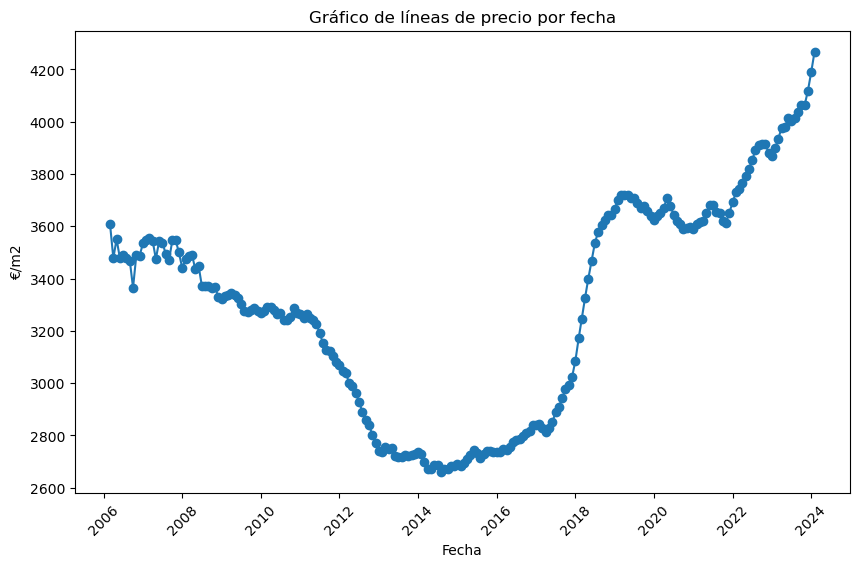

In [24]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

plt.plot(hist_comp_madrid_int['fecha'], hist_comp_madrid_int['€/m2'], marker='o', linestyle='-')  # Crear el gráfico de líneas

plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('€/m2')  # Etiqueta del eje y
plt.title('Gráfico de líneas de precio por fecha')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [25]:
hist_alq_madrid_int = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_centro.csv')

In [26]:
hist_alq_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,"18,7 €/m2","+ 2,3 %","+ 5,2 %","+ 15,5 %",NaN
1,Enero 2024,"18,3 €/m2","+ 1,8 %","+ 2,7 %","+ 14,1 %",NaN
2,Diciembre 2023,"17,9 €/m2","+ 1,0 %","+ 1,6 %","+ 13,6 %",NaN
3,Noviembre 2023,"17,7 €/m2","+ 1,9 %","+ 12,4 %","- 0,2 %",NaN
4,Octubre 2023,"17,8 €/m2","+ 0,8 %","+ 4,2 %","+ 11,6 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,n.d.,n.d.,n.d.,NaN,n.d.
214,Abril 2006,n.d.,n.d.,n.d.,NaN,n.d.
215,Marzo 2006,n.d.,n.d.,n.d.,NaN,n.d.
216,Febrero 2006,n.d.,n.d.,n.d.,NaN,n.d.


In [27]:
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [28]:
hist_alq_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [29]:
hist_alq_madrid_int = hist_alq_madrid_int.iloc[:-19, :]

In [30]:
hist_alq_madrid_int.tail()

,fecha,€/m2
194,Diciembre 2007,"12,7 €/m2"
195,Noviembre 2007,"13,4 €/m2"
196,Octubre 2007,"13,1 €/m2"
197,Septiembre 2007,"14,5 €/m2"
198,Agosto 2007,"14,1 €/m2"


In [31]:
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace('€/m2', '')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace(',','.')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].astype(float)

In [32]:
hist_alq_madrid_int[['mes', 'año']] = hist_alq_madrid_int['fecha'].str.split(expand=True)
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns='fecha')

In [33]:
hist_alq_madrid_int = hist_alq_madrid_int[['año', 'mes', '€/m2']]

In [34]:
hist_alq_madrid_int['mes'] = hist_alq_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [35]:
hist_alq_madrid_int['fecha'] = pd.to_datetime(hist_alq_madrid_int['año'].astype(str) + '-' + hist_alq_madrid_int['mes'].astype(str), format='%Y-%m')

hist_alq_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [36]:
hist_alq_madrid_int = hist_alq_madrid_int[['fecha', '€/m2']]

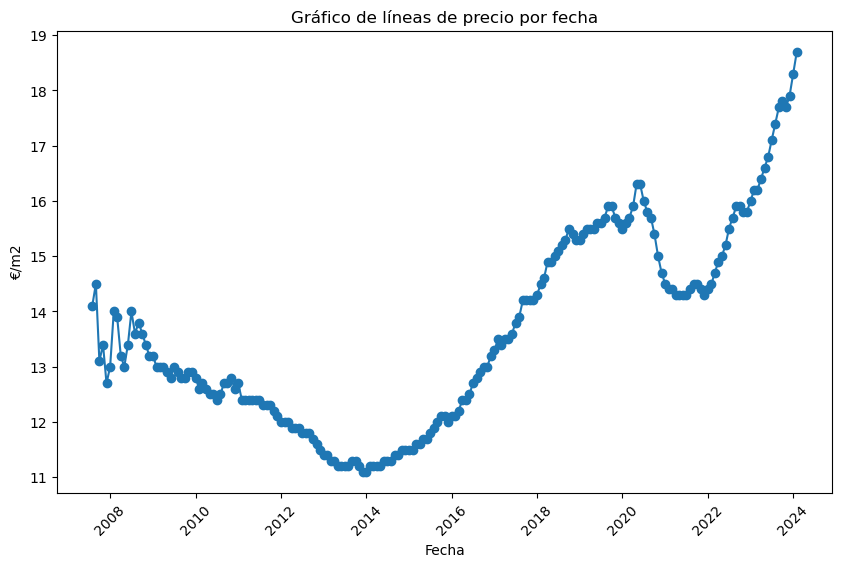

In [37]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

plt.plot(hist_alq_madrid_int['fecha'], hist_alq_madrid_int['€/m2'], marker='o', linestyle='-')  # Crear el gráfico de líneas

plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('€/m2')  # Etiqueta del eje y
plt.title('Gráfico de líneas de precio por fecha')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

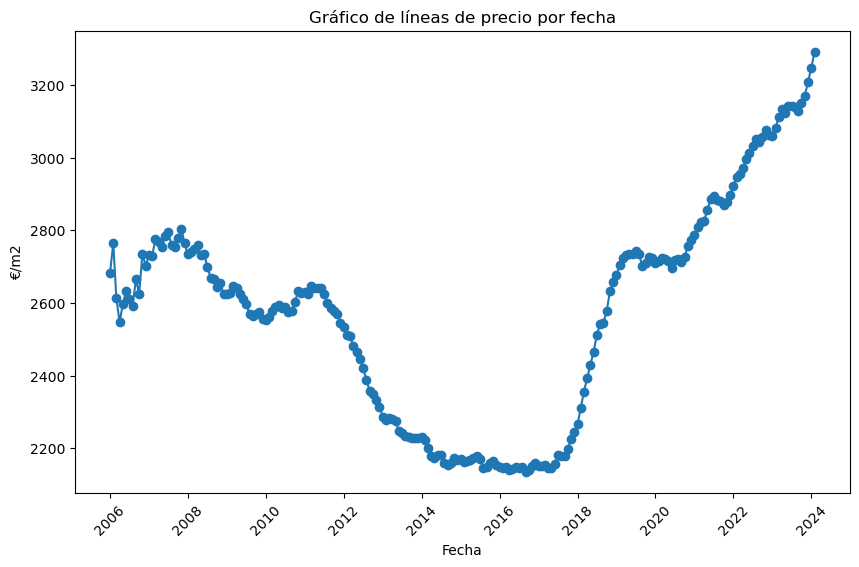

In [38]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'datos' con una columna 'fecha' y una columna 'precio'
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

plt.plot(hist_comp_madrid['fecha'], hist_comp_madrid['€/m2'], marker='o', linestyle='-')  # Crear el gráfico de líneas

plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('€/m2')  # Etiqueta del eje y
plt.title('Gráfico de líneas de precio por fecha')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [39]:
hist_alq_madrid = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_comunidad.csv')

In [40]:
hist_alq_madrid = hist_alq_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [41]:
hist_alq_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [42]:
hist_alq_madrid = hist_alq_madrid.iloc[:-15, :]

In [43]:
hist_alq_madrid.tail()

,fecha,€/m2
198,Agosto 2007,"11,4 €/m2"
199,Julio 2007,"11,5 €/m2"
200,Junio 2007,"11,4 €/m2"
201,Mayo 2007,"11,9 €/m2"
202,Abril 2007,"11,6 €/m2"


In [44]:
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace('€/m2', '')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace(',','.')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].astype(float)

In [45]:
hist_alq_madrid[['mes', 'año']] = hist_alq_madrid['fecha'].str.split(expand=True)
hist_alq_madrid = hist_alq_madrid.drop(columns='fecha')

In [46]:
hist_alq_madrid = hist_alq_madrid[['año', 'mes', '€/m2']]

In [47]:
hist_alq_madrid['mes'] = hist_alq_madrid['mes'].str.lower().replace(meses_a_numero)

In [48]:
hist_alq_madrid['fecha'] = pd.to_datetime(hist_alq_madrid['año'].astype(str) + '-' + hist_alq_madrid['mes'].astype(str), format='%Y-%m')

hist_alq_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [49]:
hist_alq_madrid = hist_alq_madrid[['fecha', '€/m2']]

In [50]:
hist_mad = pd.merge(hist_comp_madrid, hist_alq_madrid, on='fecha', how='inner')

hist_mad

,fecha,€/m2_x,€/m2_y
0,2024-02-01,3292,16.80
1,2024-01-01,3247,16.50
2,2023-12-01,3208,16.20
3,2023-11-01,3170,16.00
4,2023-10-01,3152,16.10
...,...,...,...
198,2007-08-01,2759,11.40
199,2007-07-01,2794,11.50
200,2007-06-01,2783,11.40
201,2007-05-01,2754,11.90


In [51]:
hist_mad.to_excel('hist_mad.xlsx', index=False)

In [52]:
hist_comp_madrid_int.to_csv('hist_comp_madrid_centro.csv', index=False)

In [53]:
hist_comp_madrid.to_csv('hist_comp_madrid.csv', index=False)

In [54]:
hist_alq_madrid_int.to_csv('hist_alq_madrid_centro.csv', index=False)

In [55]:
hist_alq_madrid.to_csv('hist_alq_madrid.csv', index=False)

In [56]:
hist_alq_madrid_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   199 non-null    datetime64[ns]
 1   €/m2    199 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [57]:
alquiler = pd.read_csv('../alquiler/madrid_alquiler_03.2024.csv')

alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje
0,4,central,arganzuela,600.00,25,0,3,3,3,0
1,0,central,arganzuela,700.00,35,2,0,1,0,0
2,0,central,arganzuela,790.00,40,1,1,0,1,0
3,4,central,arganzuela,800.00,40,0,3,3,3,0
4,0,central,arganzuela,800.00,35,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.00,45,1,6,1,1,0
8178,3,central,villaverde,1475.00,64,2,5,1,1,0
8179,0,central,villaverde,1500.00,90,4,6,1,1,0
8180,0,central,villaverde,1895.00,80,2,0,1,1,0


In [58]:
mad_int = pd.read_csv('../venta_madrid centro/madrid_centro_compra_03.2024.csv')

mad_int

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,central,villaverde,26100,59,2,3,3,0
1,0,central,villaverde,50600,53,3,2,3,3
2,0,central,villaverde,51700,60,3,3,1,0
3,0,central,villaverde,51700,60,3,3,3,0
4,0,central,villaverde,51700,59,3,4,1,0
...,...,...,...,...,...,...,...,...,...
17819,1,central,arganzuela,1250000,302,5,-4,2,2
17820,1,central,arganzuela,1250000,380,2,-4,2,2
17821,0,central,arganzuela,1300000,360,4,-3,1,1
17822,0,central,arganzuela,1333000,214,4,6,1,1


In [59]:
mad_ext = pd.read_csv('../venta_madrid_ext/madrid_ext_compra_03.2024.csv')

mad_ext

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor
0,1,exterior,corredor de henares,24000,45,1,-4,2,2
1,1,exterior,corredor de henares,29900,72,2,-4,2,2
2,1,exterior,corredor de henares,47700,92,3,-4,2,2
3,1,exterior,corredor de henares,47700,92,3,-4,2,2
4,1,exterior,corredor de henares,49000,134,3,-4,2,2
...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2
17956,1,exterior,sureste,1400000,950,10,-4,2,2
17957,1,exterior,sureste,1500000,500,5,-4,2,2
17958,1,exterior,sureste,2000000,3000,1,-4,2,2


In [60]:
alquiler['€/m2'] = alquiler['precio'] / alquiler['superficie']

In [61]:
mad_ext['€/m2'] = mad_ext['precio'] / mad_ext['superficie']

In [62]:
mad_int['€/m2'] = mad_int['precio'] / mad_int['superficie']

In [63]:
precios = {}

for i in alquiler['distrito'].unique():
    
    df = alquiler[alquiler['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

alquiler['distrito_€/m2'] = alquiler['distrito'].map(precios)

In [64]:
precios2 = {}

for i in alquiler['distrito'].unique():
    
    df = alquiler[alquiler['distrito'] == i]
    
    precio_medio = df['precio'].mean()
    
    precios2[i] = precio_medio

alquiler['media_alq'] = alquiler['distrito'].map(precios2)

In [65]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95
1,0,central,arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95
2,0,central,arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95
3,4,central,arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95
4,0,central,arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74
8178,3,central,villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74
8179,0,central,villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74
8180,0,central,villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74


In [66]:
precios = {}

for i in mad_ext['distrito'].unique():
    
    df = mad_ext[mad_ext['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_ext['distrito_€/m2'] = mad_ext['distrito'].map(precios)

In [67]:
mad_ext

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,1,exterior,corredor de henares,24000,45,1,-4,2,2,533.33,1315.97
1,1,exterior,corredor de henares,29900,72,2,-4,2,2,415.28,1315.97
2,1,exterior,corredor de henares,47700,92,3,-4,2,2,518.48,1315.97
3,1,exterior,corredor de henares,47700,92,3,-4,2,2,518.48,1315.97
4,1,exterior,corredor de henares,49000,134,3,-4,2,2,365.67,1315.97
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27


In [68]:
mad_ext.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
16189,1,exterior,sureste,15000,28,2,-4,2,2,535.71,1291.27
16190,1,exterior,sureste,17990,36,1,-4,2,2,499.72,1291.27
8969,0,exterior,suroeste,19800,45,2,2,1,0,440.00,1395.05
10166,1,exterior,norte,24000,40,2,-4,2,2,600.00,2126.37
0,1,exterior,corredor de henares,24000,45,1,-4,2,2,533.33,1315.97
...,...,...,...,...,...,...,...,...,...,...,...
5444,1,exterior,noroeste,11750000,1100,7,-4,2,2,10681.82,2614.93
5445,1,exterior,noroeste,12000000,1100,7,-4,2,2,10909.09,2614.93
8966,1,exterior,norte,14000000,1800,7,-4,2,2,7777.78,2126.37
8967,1,exterior,norte,15000000,1300,8,-4,2,2,11538.46,2126.37


In [69]:
precios = {}

for i in mad_int['distrito'].unique():
    
    df = mad_int[mad_int['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_int['distrito_€/m2'] = mad_int['distrito'].map(precios)

In [70]:
mad_int

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77
...,...,...,...,...,...,...,...,...,...,...,...
17819,1,central,arganzuela,1250000,302,5,-4,2,2,4139.07,4700.68
17820,1,central,arganzuela,1250000,380,2,-4,2,2,3289.47,4700.68
17821,0,central,arganzuela,1300000,360,4,-3,1,1,3611.11,4700.68
17822,0,central,arganzuela,1333000,214,4,6,1,1,6228.97,4700.68


In [71]:
mad_int.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77
3967,0,central,puente de vallecas,33500,25,1,0,3,0,1340.00,2409.44
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77
...,...,...,...,...,...,...,...,...,...,...,...
15937,0,central,barrio de salamanca,12500000,570,5,6,1,1,21929.82,9605.78
15938,0,central,barrio de salamanca,12500000,550,5,6,1,1,22727.27,9605.78
11017,1,central,chamartin,12950000,1116,7,-4,2,2,11603.94,6855.51
15939,2,central,barrio de salamanca,13090000,434,5,6,1,1,30161.29,9605.78


In [72]:
mad_int.precio.describe()

count      17824.00
mean      771135.43
std       930165.16
min        26100.00
25%       245000.00
50%       470000.00
75%       900000.00
max     14200000.00
Name: precio, dtype: float64

In [73]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95
1,0,central,arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95
2,0,central,arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95
3,4,central,arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95
4,0,central,arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74
8178,3,central,villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74
8179,0,central,villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74
8180,0,central,villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74


In [74]:
mad_total = pd.concat([mad_int,mad_ext])

In [75]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27


In [76]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27


In [77]:
alquiler.precio.mean()

2269.9049132241507

In [78]:
alquiler.precio.median()

1600.0

In [79]:
mad_total.precio.mean()

637370.6351721439

In [80]:
mad_total.precio.median()

363000.0

In [81]:
mad_total.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
16189,1,exterior,sureste,15000,28,2,-4,2,2,535.71,1291.27
16190,1,exterior,sureste,17990,36,1,-4,2,2,499.72,1291.27
8969,0,exterior,suroeste,19800,45,2,2,1,0,440.00,1395.05
0,1,exterior,corredor de henares,24000,45,1,-4,2,2,533.33,1315.97
10166,1,exterior,norte,24000,40,2,-4,2,2,600.00,2126.37
...,...,...,...,...,...,...,...,...,...,...,...
15939,2,central,barrio de salamanca,13090000,434,5,6,1,1,30161.29,9605.78
8966,1,exterior,norte,14000000,1800,7,-4,2,2,7777.78,2126.37
15940,2,central,barrio de salamanca,14200000,580,4,7,1,1,24482.76,9605.78
8967,1,exterior,norte,15000000,1300,8,-4,2,2,11538.46,2126.37


In [82]:
mad_total['€/m2'].describe()

count   35784.00
mean     3870.39
std      2658.28
min         0.90
25%      2014.54
50%      2971.40
75%      5000.00
max     30161.29
Name: €/m2, dtype: float64

In [83]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95
1,0,central,arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95
2,0,central,arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95
3,4,central,arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95
4,0,central,arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74
8178,3,central,villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74
8179,0,central,villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74
8180,0,central,villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74


In [84]:
precio_medio_por_zona = alquiler.groupby('distrito')['media_alq'].mean().reset_index()

mad_total = mad_total.merge(precio_medio_por_zona, on='distrito', how='left')

mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37


In [85]:
alquiler.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
norte                 3667.65
barrio de salamanca   3380.43
chamberi              2614.29
hortaleza             2567.20
chamartin             2556.78
retiro                2519.48
moncloa               2344.99
noroeste              2339.28
centro                2163.58
fuencarral            1930.73
tetuan                1723.59
arganzuela            1530.95
ciudad lineal         1481.47
barajas               1312.33
san blas              1209.01
moratalaz             1203.75
vicalvaro             1203.69
latina                1181.09
carabanchel           1167.69
sureste               1140.37
usera                 1133.24
corredor de henares   1098.80
suroeste              1095.58
puente de vallecas    1051.46
villa de vallecas     1047.07
sur                   1045.67
villaverde            1022.74
Name: precio, dtype: float64

In [86]:
alquiler.groupby('distrito')['precio'].median().sort_values(ascending=False)

distrito
norte                 2800.00
barrio de salamanca   2565.00
chamberi              2290.00
retiro                1900.00
chamartin             1820.00
centro                1800.00
hortaleza             1700.00
noroeste              1700.00
moncloa               1650.00
fuencarral            1600.00
tetuan                1500.00
arganzuela            1466.00
barajas               1352.50
ciudad lineal         1300.00
vicalvaro             1200.00
moratalaz             1200.00
latina                1200.00
san blas              1100.00
carabanchel           1100.00
corredor de henares   1000.00
usera                 1000.00
villa de vallecas     1000.00
sur                    982.50
puente de vallecas     980.00
villaverde             958.50
sureste                950.00
suroeste               900.00
Name: precio, dtype: float64

In [87]:
media = alquiler.groupby('distrito')['precio'].mean().reset_index()
mediana = alquiler.groupby('distrito')['precio'].median().reset_index()

resultado = media.merge(mediana, on='distrito')

resultado['diferencia'] = resultado['precio_x'] - resultado['precio_y']

resultado = resultado.sort_values(by='diferencia', ascending=False)

for index, row in resultado.iterrows():
    print(f"({row['distrito']}: {row['precio_x']}, {row['precio_y']}, Diferencia: {row['diferencia']})")

(norte: 3667.6534954407293, 2800.0, Diferencia: 867.6534954407293)
(hortaleza: 2567.195918367347, 1700.0, Diferencia: 867.1959183673471)
(barrio de salamanca: 3380.4346917450366, 2565.0, Diferencia: 815.4346917450366)
(chamartin: 2556.7751937984494, 1820.0, Diferencia: 736.7751937984494)
(moncloa: 2344.992424242424, 1650.0, Diferencia: 694.992424242424)
(noroeste: 2339.275613275613, 1700.0, Diferencia: 639.2756132756131)
(retiro: 2519.4816053511704, 1900.0, Diferencia: 619.4816053511704)
(centro: 2163.580364212193, 1800.0, Diferencia: 363.5803642121932)
(fuencarral: 1930.7272727272727, 1600.0, Diferencia: 330.72727272727275)
(chamberi: 2614.2938144329896, 2290.0, Diferencia: 324.2938144329896)
(tetuan: 1723.585798816568, 1500.0, Diferencia: 223.58579881656806)
(suroeste: 1095.5757575757575, 900.0, Diferencia: 195.5757575757575)
(sureste: 1140.3736263736264, 950.0, Diferencia: 190.3736263736264)
(ciudad lineal: 1481.4734299516908, 1300.0, Diferencia: 181.47342995169083)
(usera: 1133.242

In [88]:
media_alq = alquiler.groupby('distrito')['precio'].mean().reset_index()
media_com = mad_total.groupby('distrito')['precio'].mean().reset_index()

resultado = media_alq.merge(media_com, on='distrito')

resultado['percen'] = resultado['precio_x']*100 / resultado['precio_y']

resultado = resultado.sort_values(by='percen', ascending=False)

for index, row in resultado.iterrows():
    print(f"({row['distrito']}: {row['precio_x']}, {row['precio_y']}, Porcentaje: {row['percen']})")

(villaverde: 1022.7439024390244, 165198.89349112427, Porcentaje: 0.6190985186556192)
(puente de vallecas: 1051.4571428571428, 176386.6351829988, Porcentaje: 0.5961093037271615)
(carabanchel: 1167.688524590164, 220925.1717171717, Porcentaje: 0.5285448079610585)
(usera: 1133.2428571428572, 226138.47899159664, Porcentaje: 0.5011278320240974)
(latina: 1181.094890510949, 241710.39323843416, Porcentaje: 0.4886405068009893)
(norte: 3667.6534954407293, 804926.8134615384, Porcentaje: 0.45565055531796866)
(moratalaz: 1203.75, 268768.0304878049, Porcentaje: 0.4478769285972124)
(sureste: 1140.3736263736264, 275256.7831733484, Porcentaje: 0.4142944683239481)
(sur: 1045.6744186046512, 253366.71272294887, Porcentaje: 0.41271183864948907)
(suroeste: 1095.5757575757575, 268427.5705931495, Porcentaje: 0.4081457635498629)
(corredor de henares: 1098.8021978021977, 269796.31295116775, Porcentaje: 0.40727102078710664)
(vicalvaro: 1203.6857142857143, 312479.5272206304, Porcentaje: 0.385204664443772)
(villa d

In [89]:
df1 = alquiler[alquiler['distrito']=='arganzuela']

In [90]:
df1.precio.describe()

count    298.00
mean    1530.95
std      518.60
min      600.00
25%     1200.00
50%     1466.00
75%     1800.00
max     5400.00
Name: precio, dtype: float64

In [91]:
df2 = alquiler[alquiler['distrito']=='barrio de salamanca']

In [92]:
df2.precio.describe()

count     957.00
mean     3380.43
std      2468.83
min       795.00
25%      1700.00
50%      2565.00
75%      4050.00
max     16500.00
Name: precio, dtype: float64

In [93]:
df3 = alquiler[alquiler['distrito']=='norte']

In [94]:
df3.precio.describe()

count     658.00
mean     3667.65
std      3654.06
min       470.00
25%      1292.50
50%      2800.00
75%      4500.00
max     30000.00
Name: precio, dtype: float64

In [95]:
df4 = mad_total['precio']

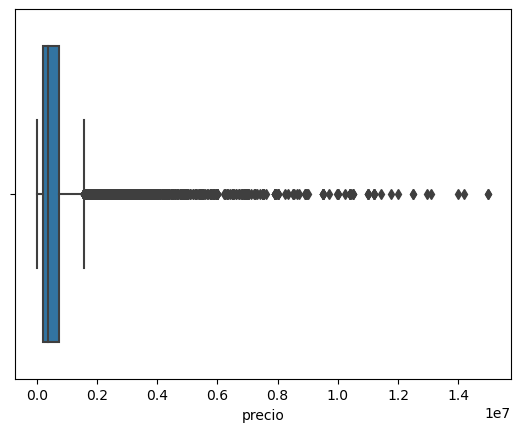

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=mad_total['precio'])
plt.show()

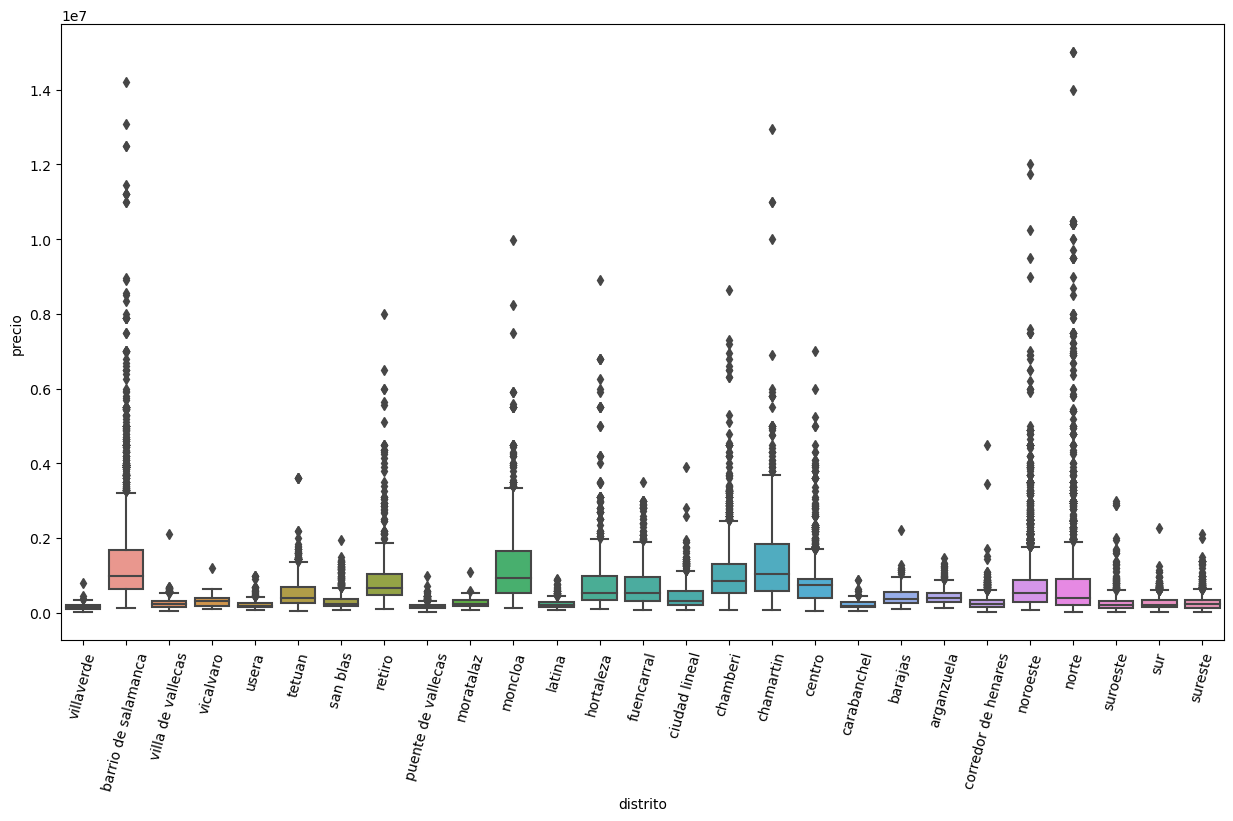

In [97]:
plt.figure(figsize=(15, 8))  # Establecer el tamaño del gráfico

# Crear el boxplot para cada distrito
sns.boxplot(data=mad_total, x='distrito', y='precio')
plt.xticks(rotation=75)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [98]:
mad_total.groupby('zona')['precio'].mean().sort_values(ascending=False)

zona
central    771135.43
exterior   504618.76
Name: precio, dtype: float64

In [99]:
alquiler.groupby('zona')['precio'].mean().sort_values(ascending=False)

zona
exterior   2402.61
central    2228.44
Name: precio, dtype: float64

In [100]:
mad_total.zona.unique()

array(['central', 'exterior'], dtype=object)

In [101]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95
1,0,central,arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95
2,0,central,arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95
3,4,central,arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95
4,0,central,arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74
8178,3,central,villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74
8179,0,central,villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74
8180,0,central,villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74


In [102]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37


In [103]:
mad_total[mad_total['€/m2']<mad_total['distrito_€/m2']]

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
35759,1,exterior,sureste,1000000,4489,13,-4,2,2,222.77,1291.27,1140.37
35763,1,exterior,sureste,1000000,1240,12,-4,2,2,806.45,1291.27,1140.37
35765,1,exterior,sureste,1100000,1000,7,-4,2,2,1100.00,1291.27,1140.37
35770,1,exterior,sureste,1375000,1500,12,-4,2,2,916.67,1291.27,1140.37


In [104]:
mad_int.shape

(17824, 11)

In [105]:
mad_int[mad_int['€/m2']<mad_int['distrito_€/m2']]

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77
...,...,...,...,...,...,...,...,...,...,...,...
17801,0,central,arganzuela,875000,260,12,2,1,0,3365.38,4700.68
17817,1,central,arganzuela,1198000,300,4,-4,2,2,3993.33,4700.68
17819,1,central,arganzuela,1250000,302,5,-4,2,2,4139.07,4700.68
17820,1,central,arganzuela,1250000,380,2,-4,2,2,3289.47,4700.68


In [106]:
mad_ext.shape

(17960, 11)

In [107]:
mad_ext[mad_ext['€/m2']<mad_ext['distrito_€/m2']]

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,1,exterior,corredor de henares,24000,45,1,-4,2,2,533.33,1315.97
1,1,exterior,corredor de henares,29900,72,2,-4,2,2,415.28,1315.97
2,1,exterior,corredor de henares,47700,92,3,-4,2,2,518.48,1315.97
3,1,exterior,corredor de henares,47700,92,3,-4,2,2,518.48,1315.97
4,1,exterior,corredor de henares,49000,134,3,-4,2,2,365.67,1315.97
...,...,...,...,...,...,...,...,...,...,...,...
17935,1,exterior,sureste,1000000,4489,13,-4,2,2,222.77,1291.27
17939,1,exterior,sureste,1000000,1240,12,-4,2,2,806.45,1291.27
17941,1,exterior,sureste,1100000,1000,7,-4,2,2,1100.00,1291.27
17946,1,exterior,sureste,1375000,1500,12,-4,2,2,916.67,1291.27


In [108]:
alq_int = alquiler[alquiler['zona']=='central']
alq_ext = alquiler[alquiler['zona']=='exterior']

In [109]:
alq_int.shape

(6234, 13)

In [110]:
alq_int[alq_int['€/m2']<alq_int['distrito_€/m2']]

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
1,0,central,arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95
2,0,central,arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95
3,4,central,arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95
7,4,central,arganzuela,800.00,40,0,5,0,1,0,20.00,21.04,1530.95
8,0,central,arganzuela,820.00,52,1,3,0,1,0,15.77,21.04,1530.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,0,central,villaverde,1200.00,90,2,8,1,1,0,13.33,15.34,1022.74
8170,0,central,villaverde,1200.00,90,3,3,1,1,0,13.33,15.34,1022.74
8172,2,central,villaverde,1275.00,100,2,6,0,1,0,12.75,15.34,1022.74
8173,0,central,villaverde,1300.00,103,3,2,1,1,0,12.62,15.34,1022.74


In [111]:
alq_ext.shape

(1948, 13)

In [112]:
alq_ext[alq_ext['€/m2']<alq_ext['distrito_€/m2']]

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
3976,0,exterior,corredor de henares,590.00,65,1,0,0,0,1,9.08,10.69,1098.80
3977,3,exterior,corredor de henares,590.00,69,1,1,1,0,1,8.55,10.69,1098.80
3985,0,exterior,corredor de henares,750.00,87,2,3,1,1,0,8.62,10.69,1098.80
3990,3,exterior,corredor de henares,770.00,78,0,3,3,3,0,9.87,10.69,1098.80
3994,0,exterior,corredor de henares,800.00,76,1,2,1,1,0,10.53,10.69,1098.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,1,exterior,suroeste,1800.00,284,4,-4,2,2,1,6.34,8.91,1095.58
7380,1,exterior,suroeste,1800.00,255,3,-4,2,2,1,7.06,8.91,1095.58
7381,1,exterior,suroeste,1800.00,255,3,-4,2,2,1,7.06,8.91,1095.58
7382,1,exterior,suroeste,2000.00,350,3,-4,2,2,1,5.71,8.91,1095.58


In [113]:
media_alq = alquiler.groupby('distrito')['precio'].mean().reset_index()
media_com = mad_total.groupby('distrito')['precio'].mean().reset_index()

resultado = media_alq.merge(media_com, on='distrito')

resultado['percen'] = resultado['precio_x']*100 / resultado['precio_y']

resultado = resultado.sort_values(by='percen', ascending=False)

for index, row in resultado.iterrows():
    print(f"({row['distrito']}: {row['precio_x']}, {row['precio_y']}, Porcentaje: {row['percen']})")

(villaverde: 1022.7439024390244, 165198.89349112427, Porcentaje: 0.6190985186556192)
(puente de vallecas: 1051.4571428571428, 176386.6351829988, Porcentaje: 0.5961093037271615)
(carabanchel: 1167.688524590164, 220925.1717171717, Porcentaje: 0.5285448079610585)
(usera: 1133.2428571428572, 226138.47899159664, Porcentaje: 0.5011278320240974)
(latina: 1181.094890510949, 241710.39323843416, Porcentaje: 0.4886405068009893)
(norte: 3667.6534954407293, 804926.8134615384, Porcentaje: 0.45565055531796866)
(moratalaz: 1203.75, 268768.0304878049, Porcentaje: 0.4478769285972124)
(sureste: 1140.3736263736264, 275256.7831733484, Porcentaje: 0.4142944683239481)
(sur: 1045.6744186046512, 253366.71272294887, Porcentaje: 0.41271183864948907)
(suroeste: 1095.5757575757575, 268427.5705931495, Porcentaje: 0.4081457635498629)
(corredor de henares: 1098.8021978021977, 269796.31295116775, Porcentaje: 0.40727102078710664)
(vicalvaro: 1203.6857142857143, 312479.5272206304, Porcentaje: 0.385204664443772)
(villa d

In [114]:
alq_int.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
barrio de salamanca   3380.43
chamberi              2614.29
hortaleza             2567.20
chamartin             2556.78
retiro                2519.48
moncloa               2344.99
centro                2163.58
fuencarral            1930.73
tetuan                1723.59
arganzuela            1530.95
ciudad lineal         1481.47
barajas               1312.33
san blas              1209.01
moratalaz             1203.75
vicalvaro             1203.69
latina                1181.09
carabanchel           1167.69
usera                 1133.24
puente de vallecas    1051.46
villa de vallecas     1047.07
villaverde            1022.74
Name: precio, dtype: float64

In [115]:
alq_ext.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
norte                 3667.65
noroeste              2339.28
sureste               1140.37
corredor de henares   1098.80
suroeste              1095.58
sur                   1045.67
Name: precio, dtype: float64

In [116]:
mad_int.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
barrio de salamanca   1468394.55
chamartin             1418319.72
moncloa               1317128.66
chamberi              1154868.96
retiro                 921524.19
hortaleza              883195.68
centro                 768707.07
fuencarral             731993.14
tetuan                 557069.39
barajas                463883.96
ciudad lineal          455608.37
arganzuela             435468.10
san blas               338718.83
vicalvaro              312479.53
villa de vallecas      273725.32
moratalaz              268768.03
latina                 241710.39
usera                  226138.48
carabanchel            220925.17
puente de vallecas     176386.64
villaverde             165198.89
Name: precio, dtype: float64

In [117]:
mad_ext.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
norte                 804926.81
noroeste              756146.57
sureste               275256.78
corredor de henares   269796.31
suroeste              268427.57
sur                   253366.71
Name: precio, dtype: float64

In [118]:
mad_int.shape

(17824, 11)

In [119]:
def filter_percentiles(group):
    q25 = group['precio'].quantile(0.25)
    q75 = group['precio'].quantile(0.75)
    return group[(group['precio'] >= q25) & (group['precio'] <= q75)]

nuevos_dataframes = mad_int.groupby('distrito').apply(filter_percentiles)

In [120]:
percentiles = mad_int.groupby('distrito')['precio'].quantile([0.25, 0.75]).unstack(level=1)

# Filtrar los datos dentro de los percentiles 25 y 75
datos_filtrados = mad_int.merge(percentiles, on='distrito')
datos_filtrados = datos_filtrados[(datos_filtrados['precio'] >= datos_filtrados[0.25]) & (datos_filtrados['precio'] <= datos_filtrados[0.75])]

# Calcular la media de precio por distrito en los nuevos DataFrames filtrados
media_por_distrito_filtrados = datos_filtrados.groupby('distrito')['precio'].mean().sort_values(ascending=False)

print(media_por_distrito_filtrados)

distrito
chamartin             1116495.29
barrio de salamanca   1038569.46
moncloa                985003.23
chamberi               868501.18
centro                 699582.11
retiro                 691587.64
hortaleza              591267.20
fuencarral             571017.09
tetuan                 426675.30
arganzuela             406255.48
barajas                378814.31
ciudad lineal          342956.26
vicalvaro              305391.35
san blas               254138.34
villa de vallecas      244551.54
moratalaz              244460.37
latina                 211349.85
carabanchel            202275.91
usera                  193439.50
puente de vallecas     160995.74
villaverde             153457.28
Name: precio, dtype: float64


In [121]:
percentiles = alq_int.groupby('distrito')['precio'].quantile([0.25, 0.75]).unstack(level=1)

# Filtrar los datos dentro de los percentiles 25 y 75
datos_filtrados = alq_int.merge(percentiles, on='distrito')
datos_filtrados = datos_filtrados[(datos_filtrados['precio'] >= datos_filtrados[0.25]) & (datos_filtrados['precio'] <= datos_filtrados[0.75])]

# Calcular la media de precio por distrito en los nuevos DataFrames filtrados
media_por_distrito_filtrados = datos_filtrados.groupby('distrito')['precio'].mean().sort_values(ascending=False)

print(media_por_distrito_filtrados)

distrito
barrio de salamanca   2706.47
chamberi              2263.76
retiro                1956.51
chamartin             1913.67
hortaleza             1838.61
centro                1830.68
moncloa               1714.08
fuencarral            1664.79
tetuan                1510.39
arganzuela            1483.94
barajas               1332.86
ciudad lineal         1290.56
moratalaz             1207.19
vicalvaro             1185.47
latina                1173.92
san blas              1141.95
carabanchel           1083.67
usera                 1045.76
villa de vallecas     1021.00
puente de vallecas     987.64
villaverde             968.60
Name: precio, dtype: float64


In [122]:
percentiles = mad_ext.groupby('distrito')['precio'].quantile([0.25, 0.75]).unstack(level=1)

# Filtrar los datos dentro de los percentiles 25 y 75
datos_filtrados = mad_ext.merge(percentiles, on='distrito')
datos_filtrados = datos_filtrados[(datos_filtrados['precio'] >= datos_filtrados[0.25]) & (datos_filtrados['precio'] <= datos_filtrados[0.75])]

# Calcular la media de precio por distrito en los nuevos DataFrames filtrados
media_por_distrito_filtrados = datos_filtrados.groupby('distrito')['precio'].mean().sort_values(ascending=False)

print(media_por_distrito_filtrados)

distrito
noroeste              561604.46
norte                 434865.79
corredor de henares   233271.47
sureste               227817.50
suroeste              220877.97
sur                   220847.43
Name: precio, dtype: float64


In [123]:
percentiles = alq_ext.groupby('distrito')['precio'].quantile([0.25, 0.75]).unstack(level=1)

# Filtrar los datos dentro de los percentiles 25 y 75
datos_filtrados = alq_ext.merge(percentiles, on='distrito')
datos_filtrados = datos_filtrados[(datos_filtrados['precio'] >= datos_filtrados[0.25]) & (datos_filtrados['precio'] <= datos_filtrados[0.75])]

# Calcular la media de precio por distrito en los nuevos DataFrames filtrados
media_por_distrito_filtrados = datos_filtrados.groupby('distrito')['precio'].mean().sort_values(ascending=False)

print(media_por_distrito_filtrados)

distrito
norte                 2885.44
noroeste              1736.47
corredor de henares   1047.39
sur                   1012.50
sureste                990.20
suroeste               941.97
Name: precio, dtype: float64


In [124]:
alquiler['pais'] = 'españa'
mad_int['pais'] = 'españa'
mad_ext['pais'] = 'españa'
mad_total['pais'] = 'españa'

In [125]:
alquiler['ciudad'] = 'madrid'
mad_int['ciudad'] = 'madrid'
mad_ext['ciudad'] = 'madrid'
mad_total['ciudad'] = 'madrid'

In [126]:
mad_int.rename(columns={'distrito': 'Distrito'}, inplace=True)

In [127]:
distritos_madrid = {
    'villaverde': 'Villaverde',
    'barrio de salamanca': 'Salamanca',
    'villa de vallecas': 'Villa de Vallecas',
    'vicalvaro': 'Vicalvaro',
    'usera': 'Usera',
    'tetuan': 'Tetuan',
    'san blas': 'San Blas - Canillejas',
    'retiro': 'Retiro',
    'puente de vallecas': 'Puente de Vallecas',
    'moratalaz': 'Moratalaz',
    'moncloa': 'Moncloa - Aravaca',
    'latina': 'Latina',
    'hortaleza': 'Hortaleza',
    'fuencarral': 'Fuencarral - El Pardo',
    'ciudad lineal': 'Ciudad Lineal',
    'chamberi': 'Chamberi',
    'chamartin': 'Chamartin',
    'centro': 'Centro',
    'carabanchel': 'Carabanchel',
    'barajas': 'Barajas',
    'arganzuela': 'Arganzuela'
}

In [128]:
mad_int['Distrito'] = mad_int['Distrito'].replace(distritos_madrid)

In [129]:
mad_int.Distrito.unique()

array(['Villaverde', 'Salamanca', 'Villa de Vallecas', 'Vicalvaro',
       'Usera', 'Tetuan', 'San Blas - Canillejas', 'Retiro',
       'Puente de Vallecas', 'Moratalaz', 'Moncloa - Aravaca', 'Latina',
       'Hortaleza', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberi',
       'Chamartin', 'Centro', 'Carabanchel', 'Barajas', 'Arganzuela'],
      dtype=object)

In [130]:
codigos_postales_madrid = {
    'villaverde': [28021],
    'barrio de salamanca': [28006, 28001, 28028],
    'villa de vallecas': [28051, 28031],
    'vicalvaro': [28022, 28032, 28052],
    'usera': [28026, 28041],
    'tetuan': [28020, 28039, 28029],
    'san blas': [28037, 28022],
    'retiro': [28007, 28009, 28014],
    'puente de vallecas': [28018, 28038, 28053],
    'moratalaz': [28030],
    'moncloa': [28008, 28011, 28023, 28035, 28040],
    'latina': [28044, 28047, 28024],
    'hortaleza': [28033, 28043, 28050, 28055],
    'fuencarral': [28034, 28048, 28049, 28100],
    'ciudad lineal': [28027, 28017],
    'chamberi': [28003, 28004, 28010, 28015],
    'chamartin': [28016, 28036, 28046, 28002, 28028],
    'centro': [28012, 28004, 28013],
    'carabanchel': [28025, 28054, 28019],
    'barajas': [28042],
    'arganzuela': [28005, 28045]
}

In [131]:
mad_int['codigo_postal'] = mad_int['Distrito'].map(codigos_postales_madrid)

In [132]:
mad_int_prueba = mad_int.copy()

In [133]:
codigo_postal_expandido = mad_int['codigo_postal'].apply(pd.Series)

# Renombrar las columnas con el prefijo 'codigo_postal'
codigo_postal_expandido = codigo_postal_expandido.add_prefix('codigo_postal')

# Concatenar las nuevas columnas al DataFrame original
mad_int = pd.concat([mad_int, codigo_postal_expandido], axis=1)

In [134]:
mad_int = mad_int.fillna(0)

In [135]:
mad_int['€/m2'].describe()

count   17824.00
mean     5395.23
std      2847.45
min       442.37
25%      3200.00
50%      4782.61
75%      7058.82
max     30161.29
Name: €/m2, dtype: float64

In [136]:
mad_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   descripcion     17824 non-null  int64  
 1   zona            17824 non-null  object 
 2   Distrito        17824 non-null  object 
 3   precio          17824 non-null  int64  
 4   superficie      17824 non-null  int64  
 5   habitaciones    17824 non-null  int64  
 6   plantas         17824 non-null  int64  
 7   caract          17824 non-null  int64  
 8   ascensor        17824 non-null  int64  
 9   €/m2            17824 non-null  float64
 10  distrito_€/m2   17824 non-null  float64
 11  pais            17824 non-null  object 
 12  ciudad          17824 non-null  object 
 13  codigo_postal   17824 non-null  int64  
 14  codigo_postal0  17824 non-null  float64
dtypes: float64(3), int64(8), object(4)
memory usage: 2.0+ MB


In [137]:
mad_int['€/m2'] = mad_int['€/m2'].astype(float)
mad_int['distrito_€/m2'] = mad_int['distrito_€/m2'].astype(float)

In [138]:
mad_total['€/m2'] = mad_total['€/m2'].astype(float)
mad_total['distrito_€/m2'] = mad_total['distrito_€/m2'].astype(float)

In [139]:
alquiler['€/m2'] = alquiler['€/m2'].astype(float)
alquiler['distrito_€/m2'] = alquiler['distrito_€/m2'].astype(float)

In [140]:
mad_ext['€/m2'] = mad_ext['€/m2'].astype(float)
mad_ext['distrito_€/m2'] = mad_ext['distrito_€/m2'].astype(float)

In [141]:
"""mad_int['codigo_postal0'] = mad_int['codigo_postal0'].astype(int)
mad_int['codigo_postal1'] = mad_int['codigo_postal1'].astype(int)
mad_int['codigo_postal2'] = mad_int['codigo_postal2'].astype(int)
mad_int['codigo_postal3'] = mad_int['codigo_postal3'].astype(int)
mad_int['codigo_postal4'] = mad_int['codigo_postal4'].astype(int)"""

"mad_int['codigo_postal0'] = mad_int['codigo_postal0'].astype(int)\nmad_int['codigo_postal1'] = mad_int['codigo_postal1'].astype(int)\nmad_int['codigo_postal2'] = mad_int['codigo_postal2'].astype(int)\nmad_int['codigo_postal3'] = mad_int['codigo_postal3'].astype(int)\nmad_int['codigo_postal4'] = mad_int['codigo_postal4'].astype(int)"

In [142]:
mad_int['municipio'] = 'madrid'

In [143]:
mad_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   descripcion     17824 non-null  int64  
 1   zona            17824 non-null  object 
 2   Distrito        17824 non-null  object 
 3   precio          17824 non-null  int64  
 4   superficie      17824 non-null  int64  
 5   habitaciones    17824 non-null  int64  
 6   plantas         17824 non-null  int64  
 7   caract          17824 non-null  int64  
 8   ascensor        17824 non-null  int64  
 9   €/m2            17824 non-null  float64
 10  distrito_€/m2   17824 non-null  float64
 11  pais            17824 non-null  object 
 12  ciudad          17824 non-null  object 
 13  codigo_postal   17824 non-null  int64  
 14  codigo_postal0  17824 non-null  float64
 15  municipio       17824 non-null  object 
dtypes: float64(3), int64(8), object(5)
memory usage: 2.2+ MB


In [144]:
mad_int

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,pais,ciudad,codigo_postal,codigo_postal0,municipio
0,0,central,Villaverde,26100,59,2,3,3,0,442.37,2109.77,españa,madrid,0,0.00,madrid
1,0,central,Villaverde,50600,53,3,2,3,3,954.72,2109.77,españa,madrid,0,0.00,madrid
2,0,central,Villaverde,51700,60,3,3,1,0,861.67,2109.77,españa,madrid,0,0.00,madrid
3,0,central,Villaverde,51700,60,3,3,3,0,861.67,2109.77,españa,madrid,0,0.00,madrid
4,0,central,Villaverde,51700,59,3,4,1,0,876.27,2109.77,españa,madrid,0,0.00,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17819,1,central,Arganzuela,1250000,302,5,-4,2,2,4139.07,4700.68,españa,madrid,0,0.00,madrid
17820,1,central,Arganzuela,1250000,380,2,-4,2,2,3289.47,4700.68,españa,madrid,0,0.00,madrid
17821,0,central,Arganzuela,1300000,360,4,-3,1,1,3611.11,4700.68,españa,madrid,0,0.00,madrid
17822,0,central,Arganzuela,1333000,214,4,6,1,1,6228.97,4700.68,españa,madrid,0,0.00,madrid


In [145]:
mad_int.Distrito.unique()

array(['Villaverde', 'Salamanca', 'Villa de Vallecas', 'Vicalvaro',
       'Usera', 'Tetuan', 'San Blas - Canillejas', 'Retiro',
       'Puente de Vallecas', 'Moratalaz', 'Moncloa - Aravaca', 'Latina',
       'Hortaleza', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberi',
       'Chamartin', 'Centro', 'Carabanchel', 'Barajas', 'Arganzuela'],
      dtype=object)

In [146]:
#alquiler_prueba.to_csv('alquiler_prueba_limp.csv', index=False)

In [147]:
ideal = pd.read_csv('../tab_idealista_prueba.csv', sep=';')

In [148]:
ideal

,Comunidad Autonoma,Date,Distrito,Municipio,New Date,PointID,PolygonID,Provincia,Text Date,Latitude,Longitude,Número de registros,€/m2
0,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,1,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2"
1,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,10,2,Madrid,1 2010,"40,405197","-3,703886",1,"12,66 €/m2"
2,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,11,2,Madrid,1 2010,"40,408436","-3,691856",1,"12,66 €/m2"
3,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,12,2,Madrid,1 2010,"40,400798","-3,679043",1,"12,66 €/m2"
4,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,13,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9191,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,5,17,Madrid,4 2014,"40,322188","-3,684697",1,"7,78 €/m2"
9192,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,6,17,Madrid,4 2014,"40,320109","-3,69302",1,"7,78 €/m2"
9193,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,7,17,Madrid,4 2014,"40,322217","-3,696162",1,"7,78 €/m2"
9194,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,8,17,Madrid,4 2014,"40,323494","-3,712544",1,"7,78 €/m2"


In [149]:
alquiler.rename(columns={'distrito': 'Distrito'}, inplace=True)

In [150]:
alquiler['Distrito'] = alquiler['Distrito'].replace(distritos_madrid)

In [151]:
alquiler.Distrito.value_counts()

Distrito
Centro                   1263
Salamanca                 957
noroeste                  693
norte                     658
Chamberi                  582
Chamartin                 516
Tetuan                    507
Retiro                    299
Arganzuela                298
Moncloa - Aravaca         264
sur                       258
Hortaleza                 245
Fuencarral - El Pardo     242
Ciudad Lineal             207
corredor de henares       182
San Blas - Canillejas     143
Latina                    137
Carabanchel               122
Puente de Vallecas        105
sureste                    91
Villaverde                 82
Usera                      70
Vicalvaro                  70
Villa de Vallecas          67
suroeste                   66
Barajas                    30
Moratalaz                  28
Name: count, dtype: int64

In [152]:
alquiler_int = alquiler[alquiler['zona']=='central']
alquiler_ext = alquiler[alquiler['zona']=='exterior']

In [153]:
alquiler_int

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,4,central,Arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95,españa,madrid
1,0,central,Arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95,españa,madrid
2,0,central,Arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95,españa,madrid
3,4,central,Arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95,españa,madrid
4,0,central,Arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,Villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74,españa,madrid
8178,3,central,Villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74,españa,madrid
8179,0,central,Villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74,españa,madrid
8180,0,central,Villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74,españa,madrid


In [154]:
alquiler_int.Distrito.unique()

array(['Arganzuela', 'Barajas', 'Salamanca', 'Carabanchel', 'Centro',
       'Chamartin', 'Chamberi', 'Ciudad Lineal', 'Fuencarral - El Pardo',
       'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz',
       'Puente de Vallecas', 'Retiro', 'San Blas - Canillejas', 'Tetuan',
       'Usera', 'Vicalvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype=object)

In [155]:
ideal.Distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartin',
       'Chamberi', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuan', 'Usera',
       'Vicalvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [156]:
mad_int

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,pais,ciudad,codigo_postal,codigo_postal0,municipio
0,0,central,Villaverde,26100,59,2,3,3,0,442.37,2109.77,españa,madrid,0,0.00,madrid
1,0,central,Villaverde,50600,53,3,2,3,3,954.72,2109.77,españa,madrid,0,0.00,madrid
2,0,central,Villaverde,51700,60,3,3,1,0,861.67,2109.77,españa,madrid,0,0.00,madrid
3,0,central,Villaverde,51700,60,3,3,3,0,861.67,2109.77,españa,madrid,0,0.00,madrid
4,0,central,Villaverde,51700,59,3,4,1,0,876.27,2109.77,españa,madrid,0,0.00,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17819,1,central,Arganzuela,1250000,302,5,-4,2,2,4139.07,4700.68,españa,madrid,0,0.00,madrid
17820,1,central,Arganzuela,1250000,380,2,-4,2,2,3289.47,4700.68,españa,madrid,0,0.00,madrid
17821,0,central,Arganzuela,1300000,360,4,-3,1,1,3611.11,4700.68,españa,madrid,0,0.00,madrid
17822,0,central,Arganzuela,1333000,214,4,6,1,1,6228.97,4700.68,españa,madrid,0,0.00,madrid


In [157]:
ideal

,Comunidad Autonoma,Date,Distrito,Municipio,New Date,PointID,PolygonID,Provincia,Text Date,Latitude,Longitude,Número de registros,€/m2
0,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,1,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2"
1,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,10,2,Madrid,1 2010,"40,405197","-3,703886",1,"12,66 €/m2"
2,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,11,2,Madrid,1 2010,"40,408436","-3,691856",1,"12,66 €/m2"
3,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,12,2,Madrid,1 2010,"40,400798","-3,679043",1,"12,66 €/m2"
4,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,13,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9191,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,5,17,Madrid,4 2014,"40,322188","-3,684697",1,"7,78 €/m2"
9192,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,6,17,Madrid,4 2014,"40,320109","-3,69302",1,"7,78 €/m2"
9193,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,7,17,Madrid,4 2014,"40,322217","-3,696162",1,"7,78 €/m2"
9194,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,8,17,Madrid,4 2014,"40,323494","-3,712544",1,"7,78 €/m2"


In [158]:
precio_medio_distrito = mad_int.groupby('Distrito')['distrito_€/m2'].mean().to_dict()
precio_medio_distrito

{'Arganzuela': 4700.675811592114,
 'Barajas': 3574.4483090753424,
 'Carabanchel': 2714.9069443486655,
 'Centro': 7116.492167281445,
 'Chamartin': 6855.511497750332,
 'Chamberi': 7360.574652328134,
 'Ciudad Lineal': 4136.671213114754,
 'Fuencarral - El Pardo': 3880.4602686046596,
 'Hortaleza': 4493.32111372906,
 'Latina': 2854.88716321298,
 'Moncloa - Aravaca': 4333.126070492065,
 'Moratalaz': 3079.575001746664,
 'Puente de Vallecas': 2409.435861045705,
 'Retiro': 6972.373143121175,
 'Salamanca': 9605.778132567064,
 'San Blas - Canillejas': 3203.415849570938,
 'Tetuan': 5145.839577329491,
 'Usera': 2652.498258641083,
 'Vicalvaro': 2876.8427508705286,
 'Villa de Vallecas': 2565.8456759579963,
 'Villaverde': 2109.7720093705134}

In [159]:
precio_medio_distrito_alq = alquiler_int.groupby('Distrito')['distrito_€/m2'].mean().to_dict()
precio_medio_distrito_alq

{'Arganzuela': 21.037674075440375,
 'Barajas': 13.296183721715636,
 'Carabanchel': 16.57644868512916,
 'Centro': 27.48737086698923,
 'Chamartin': 21.398037466547724,
 'Chamberi': 25.991988110287334,
 'Ciudad Lineal': 17.132122905027934,
 'Fuencarral - El Pardo': 14.972153683468452,
 'Hortaleza': 14.732572847371875,
 'Latina': 16.842927032372227,
 'Moncloa - Aravaca': 16.811807516836843,
 'Moratalaz': 14.960053262316913,
 'Puente de Vallecas': 16.37540789083358,
 'Retiro': 24.721064548944966,
 'Salamanca': 29.65375131765892,
 'San Blas - Canillejas': 15.054771856495995,
 'Tetuan': 22.857314744579007,
 'Usera': 18.530016351319787,
 'Vicalvaro': 14.459927921743606,
 'Villa de Vallecas': 14.455800535751083,
 'Villaverde': 15.340223157124566}

In [160]:
ideal['precio_medio_alq'] = ideal['Distrito'].map(precio_medio_distrito_alq)

In [161]:
ideal['precio_medio'] = ideal['Distrito'].map(precio_medio_distrito)

In [162]:
ideal['precio_medio'] = ideal['precio_medio'].astype(int)

In [163]:
ideal

,Comunidad Autonoma,Date,Distrito,Municipio,New Date,PointID,PolygonID,Provincia,Text Date,Latitude,Longitude,Número de registros,€/m2,precio_medio_alq,precio_medio
0,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,1,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2",21.04,4700
1,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,10,2,Madrid,1 2010,"40,405197","-3,703886",1,"12,66 €/m2",21.04,4700
2,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,11,2,Madrid,1 2010,"40,408436","-3,691856",1,"12,66 €/m2",21.04,4700
3,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,12,2,Madrid,1 2010,"40,400798","-3,679043",1,"12,66 €/m2",21.04,4700
4,Comunidad de Madrid,Q1 2010,Arganzuela,Madrid,01/01/2010 0:00:00,13,2,Madrid,1 2010,"40,394314","-3,67352",1,"12,66 €/m2",21.04,4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9191,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,5,17,Madrid,4 2014,"40,322188","-3,684697",1,"7,78 €/m2",15.34,2109
9192,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,6,17,Madrid,4 2014,"40,320109","-3,69302",1,"7,78 €/m2",15.34,2109
9193,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,7,17,Madrid,4 2014,"40,322217","-3,696162",1,"7,78 €/m2",15.34,2109
9194,Comunidad de Madrid,Q4 2014,Villaverde,Madrid,01/10/2014 0:00:00,8,17,Madrid,4 2014,"40,323494","-3,712544",1,"7,78 €/m2",15.34,2109


In [164]:
ideal.Distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartin',
       'Chamberi', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuan', 'Usera',
       'Vicalvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [165]:
mad_int

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,pais,ciudad,codigo_postal,codigo_postal0,municipio
0,0,central,Villaverde,26100,59,2,3,3,0,442.37,2109.77,españa,madrid,0,0.00,madrid
1,0,central,Villaverde,50600,53,3,2,3,3,954.72,2109.77,españa,madrid,0,0.00,madrid
2,0,central,Villaverde,51700,60,3,3,1,0,861.67,2109.77,españa,madrid,0,0.00,madrid
3,0,central,Villaverde,51700,60,3,3,3,0,861.67,2109.77,españa,madrid,0,0.00,madrid
4,0,central,Villaverde,51700,59,3,4,1,0,876.27,2109.77,españa,madrid,0,0.00,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17819,1,central,Arganzuela,1250000,302,5,-4,2,2,4139.07,4700.68,españa,madrid,0,0.00,madrid
17820,1,central,Arganzuela,1250000,380,2,-4,2,2,3289.47,4700.68,españa,madrid,0,0.00,madrid
17821,0,central,Arganzuela,1300000,360,4,-3,1,1,3611.11,4700.68,españa,madrid,0,0.00,madrid
17822,0,central,Arganzuela,1333000,214,4,6,1,1,6228.97,4700.68,españa,madrid,0,0.00,madrid


In [166]:
mad_int.isna().sum()

descripcion       0
zona              0
Distrito          0
precio            0
superficie        0
habitaciones      0
plantas           0
caract            0
ascensor          0
€/m2              0
distrito_€/m2     0
pais              0
ciudad            0
codigo_postal     0
codigo_postal0    0
municipio         0
dtype: int64

In [167]:
alquiler_int.to_csv('alquiler_int_limp.csv', index=False)

In [168]:
alquiler_ext.to_csv('alquiler_ext_limp.csv', index=False)

In [169]:
alquiler.to_csv('alquiler_limp.csv', index=False)

In [170]:
mad_int.to_csv('mad_int_limp.csv', index=False)

In [171]:
mad_ext.to_csv('mad_ext_limp.csv', index=False)

In [172]:
mad_total.to_csv('mad_total_limp.csv', index=False)

In [173]:
ideal.to_excel('ideal_mad_int.xlsx', index=False)